How I downloaded the files and organised the folders:

1. I used the below provided code for Linux to download the files in the folder "Data"

2. I MANUALLY copied the relevant files per year into separate folders named: Data2020, Data2021, Data2022, Data2023, Data 2024 (they are until May and this is our validation set)

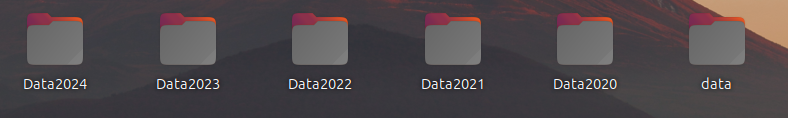
3. The I downloaded the Informacio_Estacions_Bicing_2025 used to get the capacity and I placed in in the folder Data2023 , IMPORTANT: this is from where the code is reading it

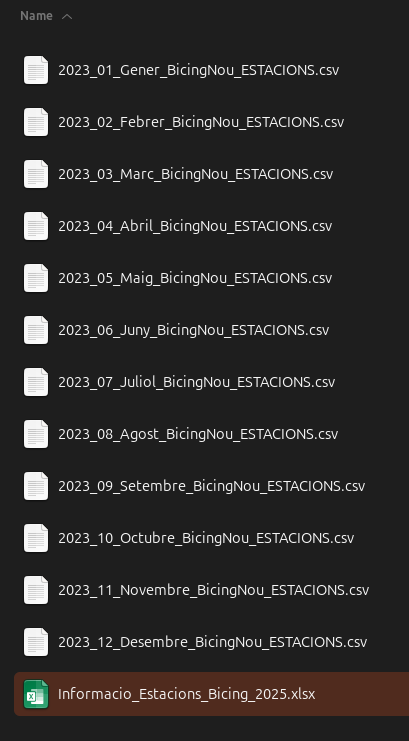
4. VERY IMPORTANT: I have updated this excel file Informacio_Estacions_Bicing_2025 , because some of the capacity for some of the stations were missing ![image-3.png]

(attachment:image-3.png)

5. I will add also this file in the files which I am loading to GitHub , please download it and copy it to the Data2023 folder in order the code to work

In [23]:
import os
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

# Define the directory where CSV files are stored
data_dir = "/home/fm/Desktop/data"

# List all CSV files in the directory
csv_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".csv")])

# Define chunk size (adjust based on memory)
chunk_size = 500000  # Reads 500,000 rows at a time

# Output file (writes data progressively)
output_file = "bicing_combined.csv"

# Initialize the first write operation
first_write = True

# Process each file with a progress bar
for file in tqdm(csv_files, desc="Processing CSV files", unit="file"):
    file_path = os.path.join(data_dir, file)

    # Extract Year and Month from filename
    parts = file.split("_")
    year = int(parts[0])
    month = int(parts[1])

    # Read file in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
        # Ensure we have at least 6 columns before modifying column 6
        if len(chunk.columns) >= 6:
            col_6_name = chunk.columns[5]  # Column 6 is index 5 (0-based index)
            
            # Convert Column 6 to integer (handling errors)
            chunk[col_6_name] = pd.to_numeric(chunk[col_6_name], errors="coerce").fillna(0).astype(int)

        # Add extracted date info as new columns
        chunk["Year"] = year
        chunk["Month"] = month

        # Append to output CSV file in chunks (avoid keeping everything in memory)
        chunk.to_csv(output_file, mode="a", header=first_write, index=False)
        
        # Ensure header is written only once
        first_write = False

print(f"\n✅ Processing complete! Data saved to {output_file}")


Processing CSV files: 100%|██████████| 53/53 [07:09<00:00,  8.11s/file]


✅ Processing complete! Data saved to bicing_combined.csv
